In [47]:
!pip install fastdtw

In [48]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
from fastdtw import fastdtw

In [2]:
segment_dir = 'segment'

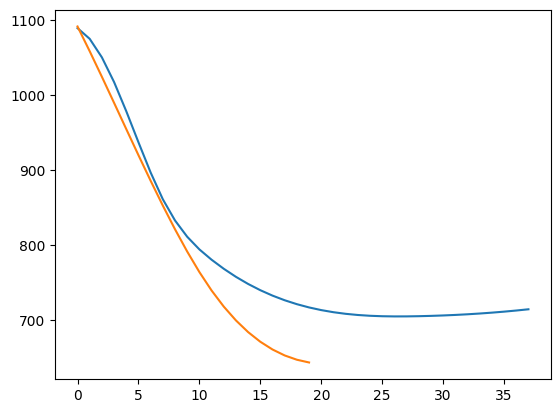

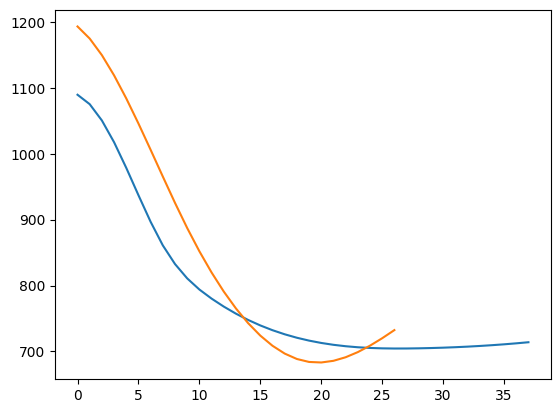

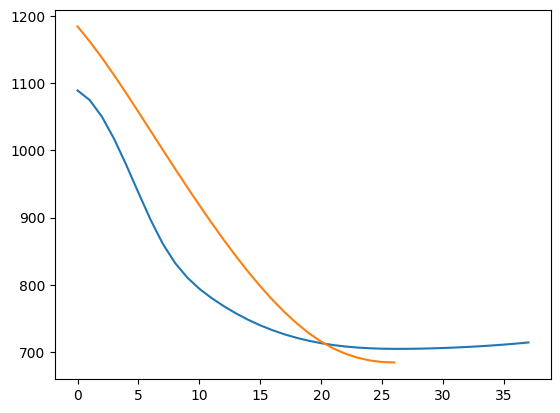

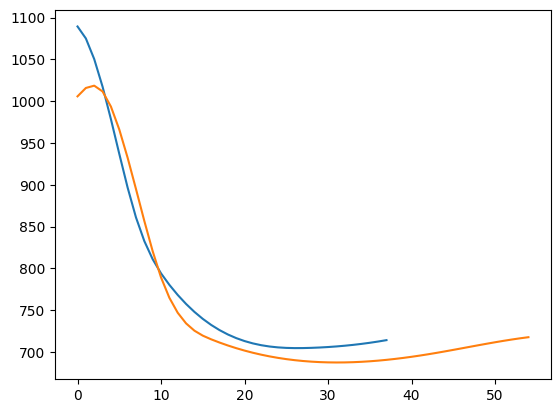

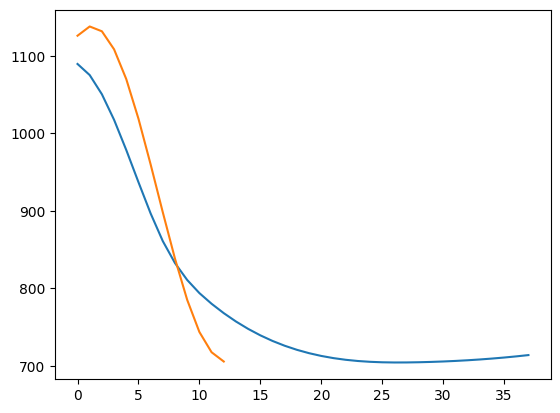

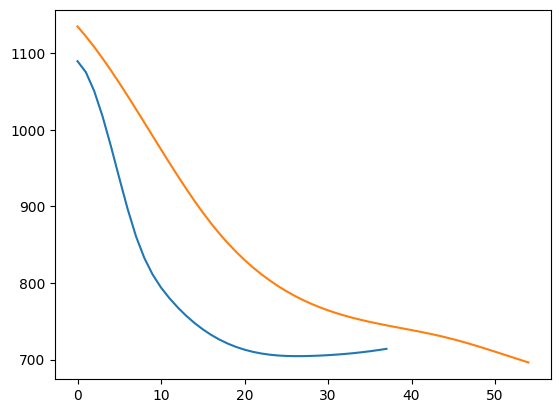

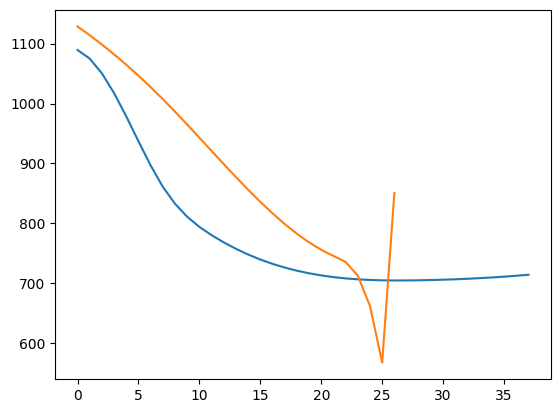

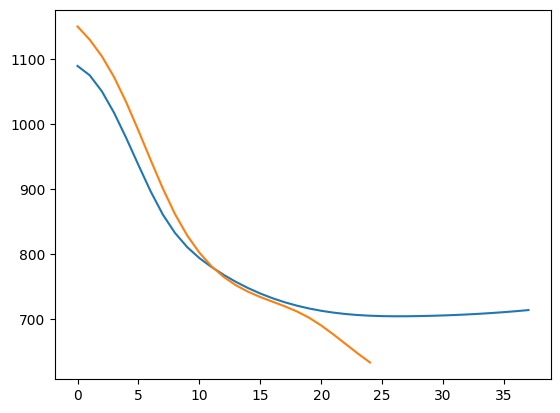

In [55]:
j = 0
for segment1_name in os.listdir(segment_dir):
    if j < 3:
        j += 1
        continue
    x = np.load(os.path.join(segment_dir, segment1_name))

    i = 0
    cost = np.inf
    for segment2_name in os.listdir(segment_dir):
        
        
        y = np.load(os.path.join(segment_dir, segment2_name))

        

        distance, path = fastdtw(x, y, radius=10)
        if distance < 700 and distance != 0:
            plt.plot(x)
            plt.plot(y)
            plt.show()
        if cost > distance and distance != 0:
            cost = min(cost, distance)# / (distance.shape[0] * distance.shape[1])
            miny = y
        #print(cost)
        
        #break

    
    break